In [39]:
import numpy as np

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

In [4]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [6]:
from gluonts.model.deepar import DeepAREstimator
#from gluonts.mx.trainer import Trainer
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Using GPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:08<00:00,  6.23it/s, avg_epoch_loss=4.41]
INFO:root:Epoch[0] Elapsed time 8.025 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.405219
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.49it/s, avg_epoch_loss=4.09]
INFO:root:Epoch[1] Elapsed time 7.704 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.093174
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.82it/s, avg_epoch_loss=4.04]
INFO:root:Epoch[2] Elapsed time 7.334 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.040423
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.27it/s, avg_epoch_loss=4.02]
INFO:root:Epoch[3] Elapsed time 7.979 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.018197
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:07<00:00,  6.99i

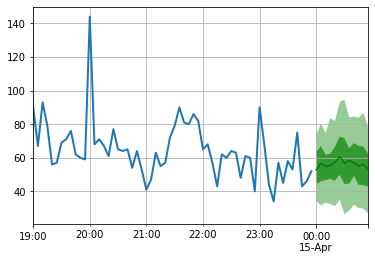

In [8]:
import matplotlib.pyplot as plt
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

In [11]:
from gluonts.model.deep_factor import DeepFactorEstimator
#from gluonts.mx.trainer import Trainer
from gluonts.trainer import Trainer

estimator = DeepFactorEstimator(freq="1min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Using GPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.36it/s, avg_epoch_loss=2.95e+3]
INFO:root:Epoch[0] Elapsed time 3.484 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=2952.440853
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.03it/s, avg_epoch_loss=441]
INFO:root:Epoch[1] Elapsed time 3.577 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=440.756965
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 13.59it/s, avg_epoch_loss=116]
INFO:root:Epoch[2] Elapsed time 3.692 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=115.685556
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 14.22it/s, avg_epoch_loss=57]
INFO:root:Epoch[3] Elapsed time 3.517 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=57.029782
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00,

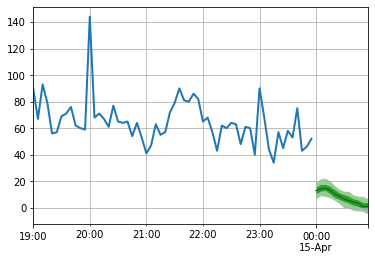

In [10]:
import matplotlib.pyplot as plt
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

### test dataset

In [12]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

In [13]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']


In [37]:
#traffic = get_dataset("traffic", regenerate=True)
traffic = get_dataset("traffic", regenerate=False)
train_entry = next(iter(traffic.train))
train_entry.keys()

INFO:root:using dataset already processed in path /N/u/pengb/.mxnet/gluon-ts/datasets/traffic.


dict_keys(['start', 'target', 'feat_static_cat', 'item_id', 'source'])

In [34]:
len(traffic.train), len(traffic.test),len(next(iter(traffic.train)))

NameError: name 'traffic' is not defined

In [45]:
def get_static_cat(dataset, trainset=True):
    cat = []
    db = dataset.train if trainset==True else dataset.test
    for entry in db:
        cat.append(entry['feat_static_cat'])
    return np.array(cat)

In [49]:
traffic_cat = get_static_cat(traffic)
traffic_cat_test = get_static_cat(traffic)
traffic_cat_test

(862, 1)

In [50]:
traffic_cat_test

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [43]:
electricity_cat = get_static_cat(electricity)

In [46]:
electricity_cat_test = get_static_cat(electricity, trainset = False)

In [48]:
electricity_cat_test.shape

(2247, 1)

In [ ]:
electricity = get_dataset("electricity", regenerate=True)
train_entry = next(iter(electricity.train))
train_entry.keys()

In [31]:
len(electricity.train), len(electricity.test)

(321, 2247)

In [32]:
train_series = to_pandas(train_entry)

In [33]:
train_series

2012-01-01 00:00:00    14.0
2012-01-01 01:00:00    18.0
2012-01-01 02:00:00    21.0
2012-01-01 03:00:00    20.0
2012-01-01 04:00:00    22.0
                       ... 
2014-05-26 15:00:00     4.0
2014-05-26 16:00:00     8.0
2014-05-26 17:00:00     6.0
2014-05-26 18:00:00     9.0
2014-05-26 19:00:00     7.0
Freq: H, Length: 21044, dtype: float32

In [14]:
dataset = get_dataset("taxi_30min", regenerate=True)

INFO:root:downloading and processing taxi_30min
INFO:root:Ignoring input file `._train.json`.
INFO:root:Ignoring input file `._train.json`.
INFO:root:Ignoring input file `._train.json`.


saving time-series into /N/u/pengb/.mxnet/gluon-ts/datasets/taxi_30min/train/data.json


INFO:root:Ignoring input file `._test.json`.
INFO:root:Ignoring input file `._test.json`.
INFO:root:Ignoring input file `._test.json`.


saving time-series into /N/u/pengb/.mxnet/gluon-ts/datasets/taxi_30min/test/data.json


In [15]:
train_entry = next(iter(dataset.train))
train_entry.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'item_id', 'source'])

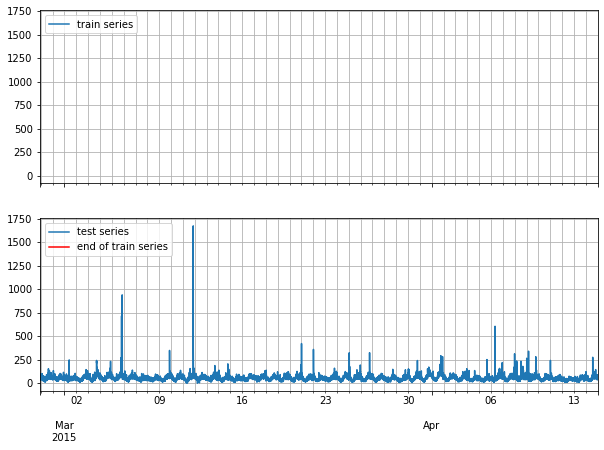

In [16]:

test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [27]:
train_entry['feat_static_cat']

array([0], dtype=int32)

In [28]:
len(train_series)

1488

In [23]:
len(test_series)

13564

In [29]:
len(dataset.train)

1214

In [25]:
len(dataset.test)

67984